In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [2]:
#read_dataset
df_wineQ =pd.read_csv(f'QualityPrediction.csv')
df_wineQ.head(5) #it show the data from above 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_wineQ.shape
#seeing the shape of the data as it has 1599 rows and 12 columns .

(1599, 12)

In [4]:
df_wineQ.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df_wineQ.isnull().sum()
#hence there is no null value present in data.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_wineQ.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df_wineQ['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df_wineQ['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

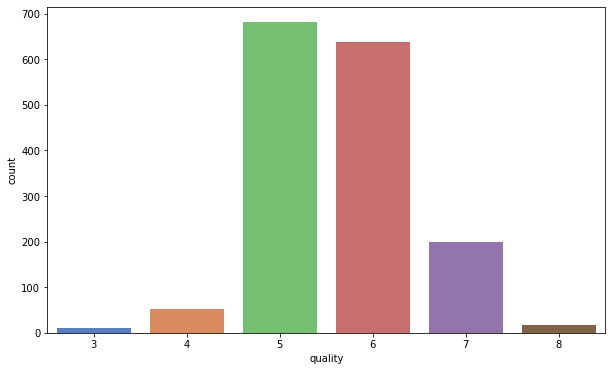

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(df_wineQ["quality"], palette="muted")
df_wineQ["quality"].value_counts()

In [10]:
#Create a new feature as category to classify the wine quality
quality = df_wineQ["quality"].values
category = []
for num in quality:
    if num<6:
        category.append("Bad")
    else:
        category.append("Good")

In [11]:
#Create a new feature for wine category.
category = pd.DataFrame(data=category, columns=["category"])
df_wineQ= pd.concat([df_wineQ,category],axis=1)

In [12]:
df_wineQ.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


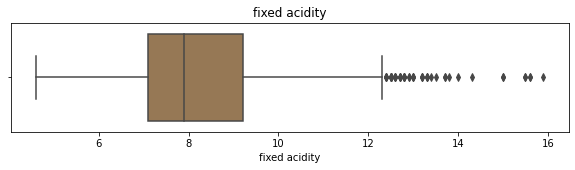

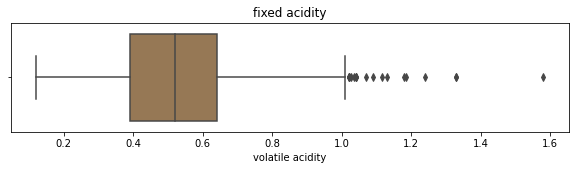

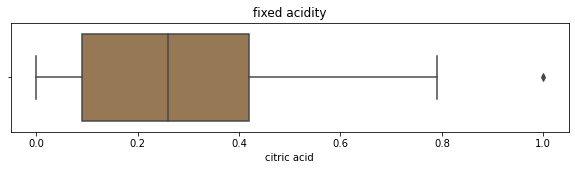

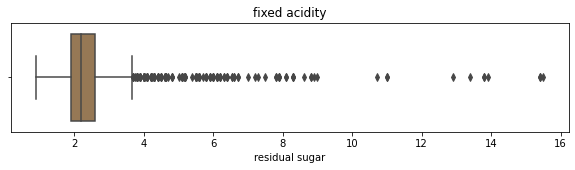

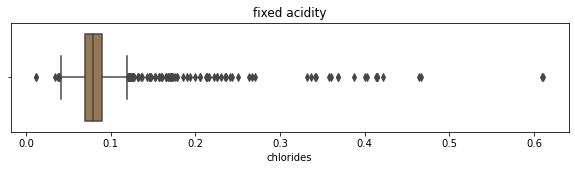

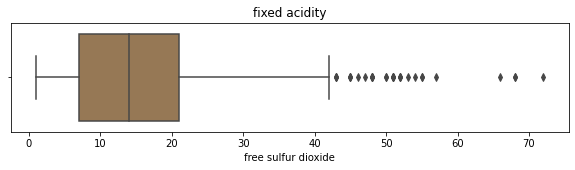

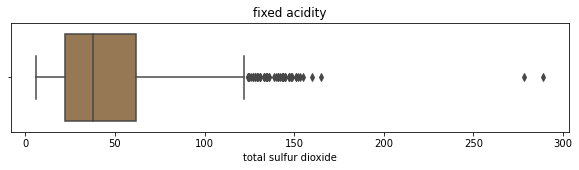

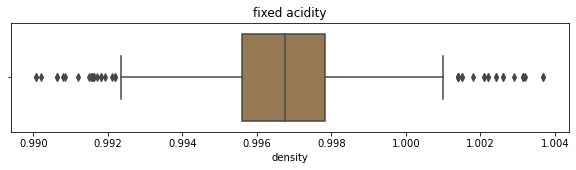

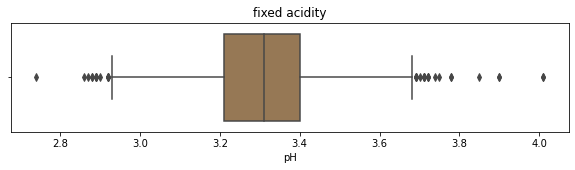

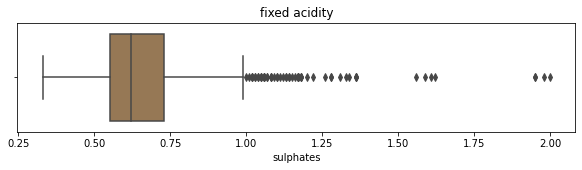

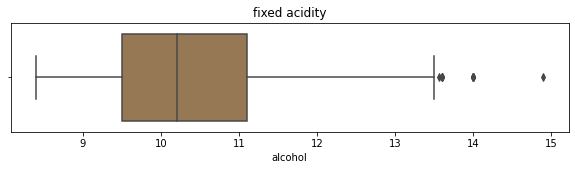

In [13]:
#checking the outliers 
for col in df_wineQ.columns[:11]:
    data=df_wineQ.copy()
    plt.figure(figsize=(10,2))
    plt.title('fixed acidity')
    sns.boxplot(x=data[col], palette=("cubehelix"))
    plt.show()

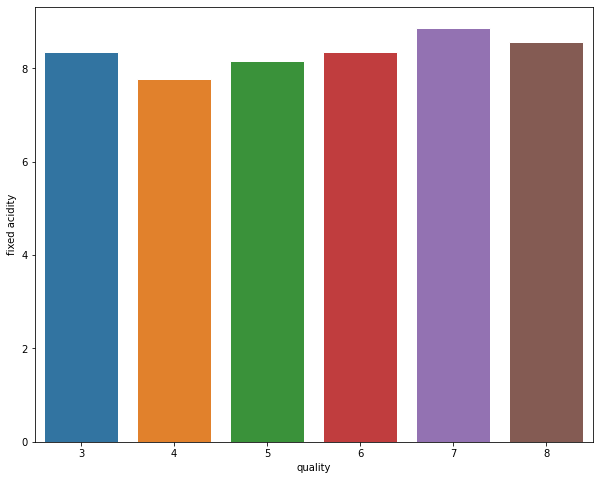

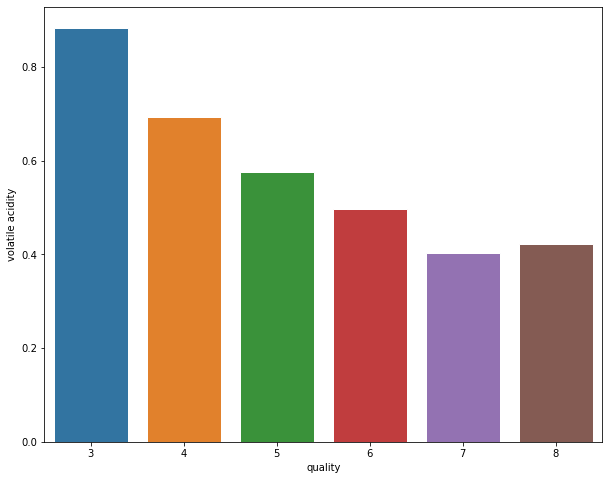

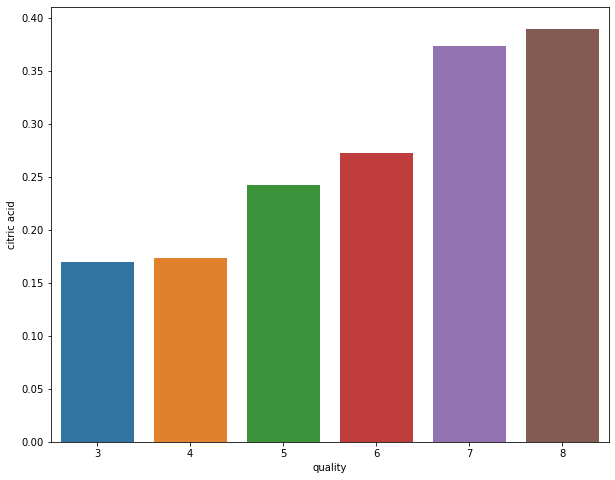

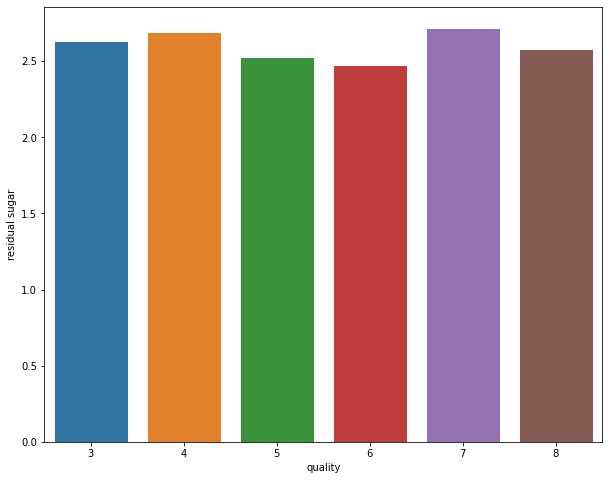

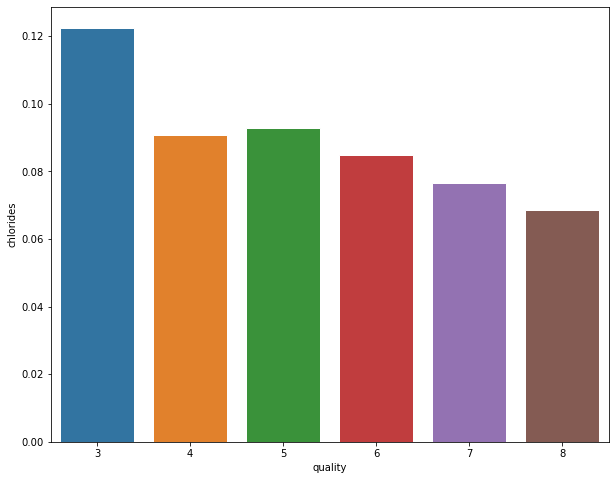

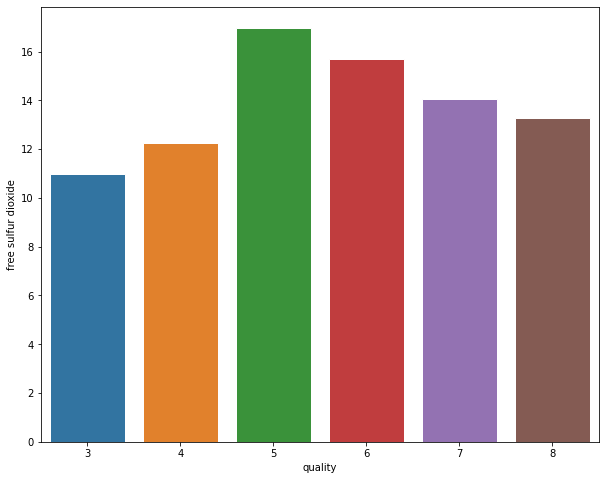

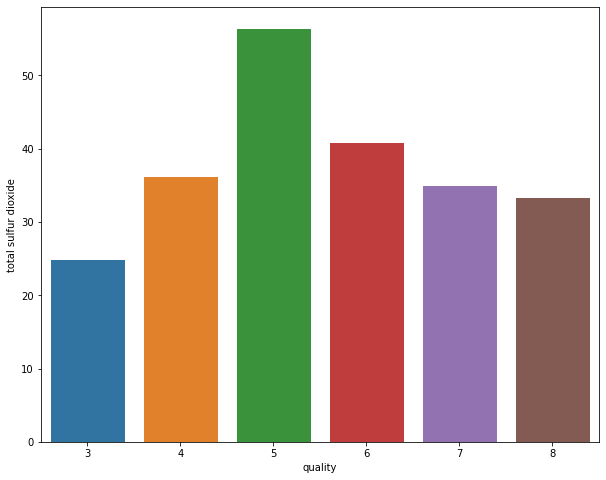

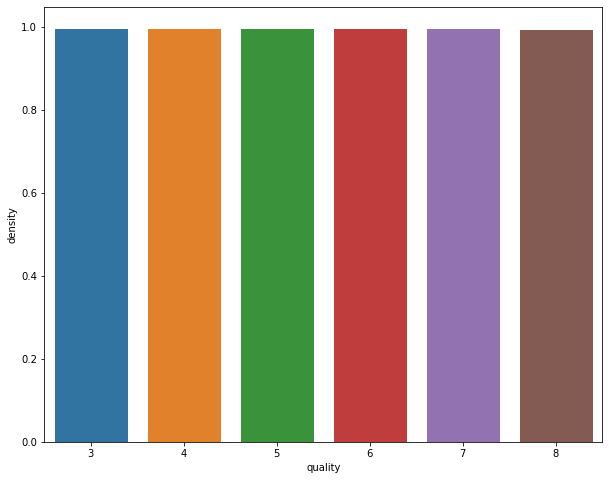

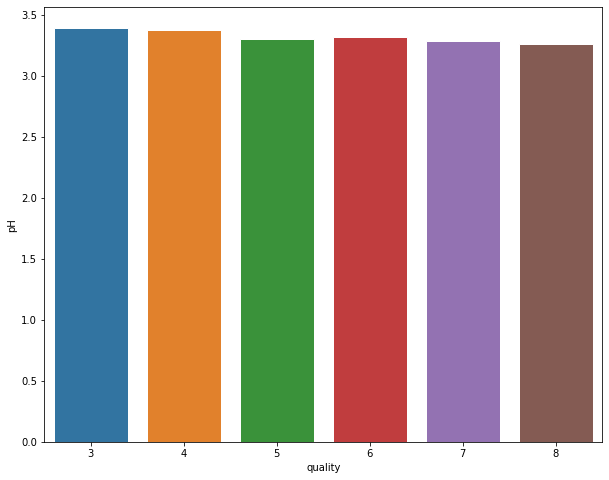

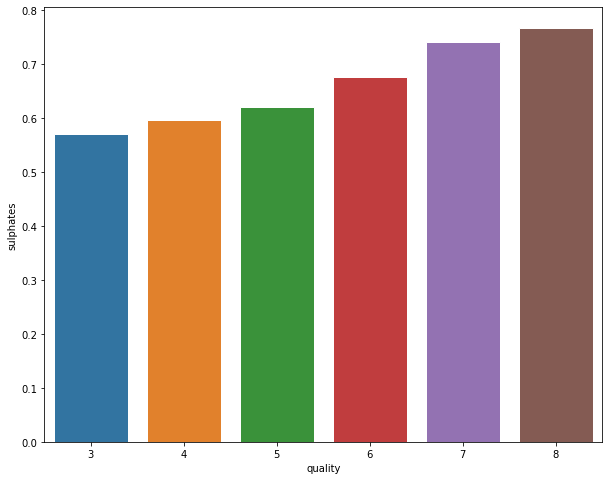

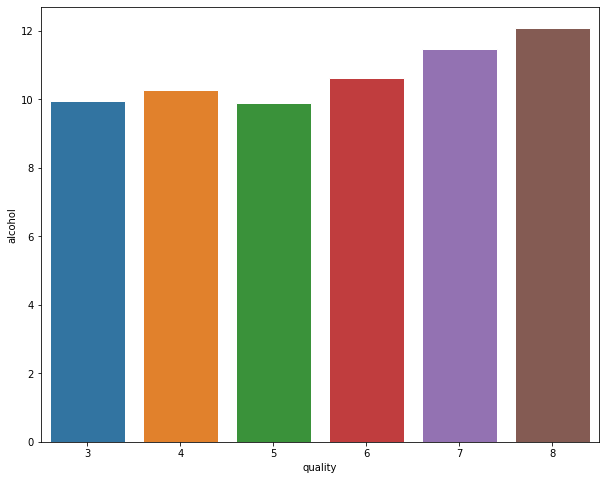

In [14]:
for col in df_wineQ.columns[:11]:
    data=df_wineQ.copy()
    plt.figure(figsize=(10,8))
    sns.barplot(x=data['quality'],y=data[col],edgecolor = 'w',ci=None)
    plt.show()

# inference:
#fixed acidity does not give any specification to classify the quality.
#downing trend in the volatile acidity as we go higher the quality. 
#upward trend in the citric acid as we go higher the quality.
#can't see any significant change between residual sugar and quality.
#downing trend in the chlorides as we go higher the quality. 
#fluctuation seen first increase in free sulfur dioxide and then decrease in terms of quality .
#fluctuation seen between total sulfur dioxide and quality.
#density remains same as quality increases .
#no change between ph and quality .
#Sulphates level goes higher with the quality of wine.
#alcohol it slightly increases as quality increases.

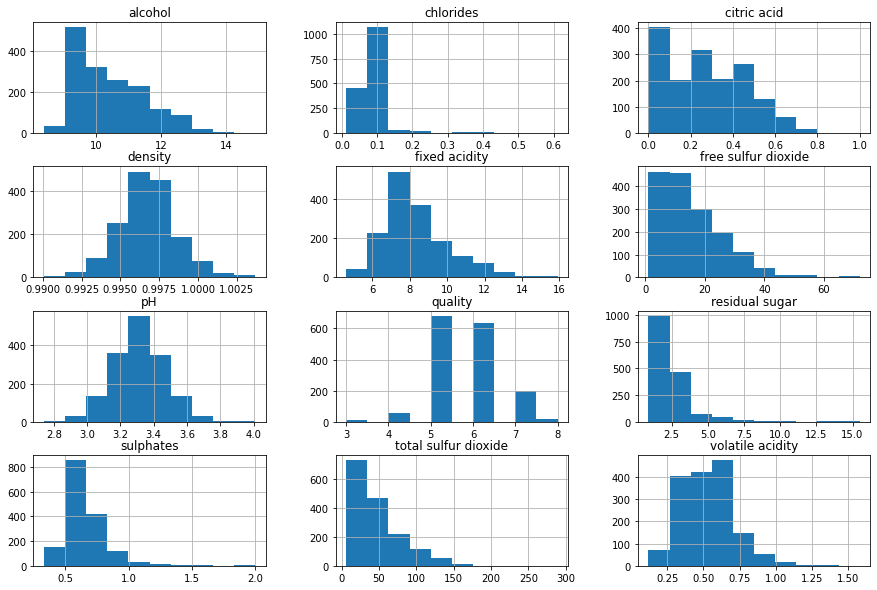

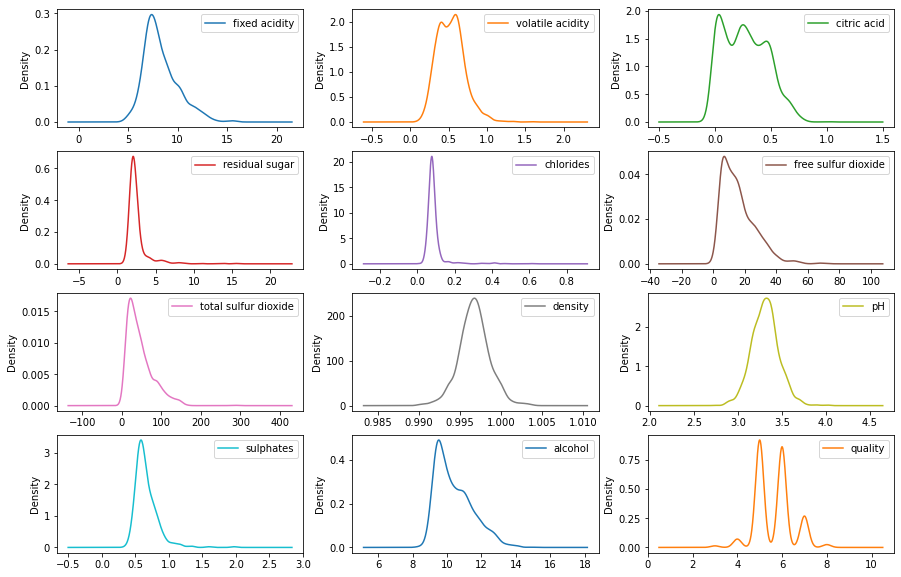

In [15]:
# Histograms
df_wineQ.hist(bins=10,figsize=(15, 10))
plt.show()
# Density
df_wineQ.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(15, 10))
plt.show()

#Density and Sulphates and fixed acidity are Noramally distributed .
#here we can observe that most of the features has skew-ness 

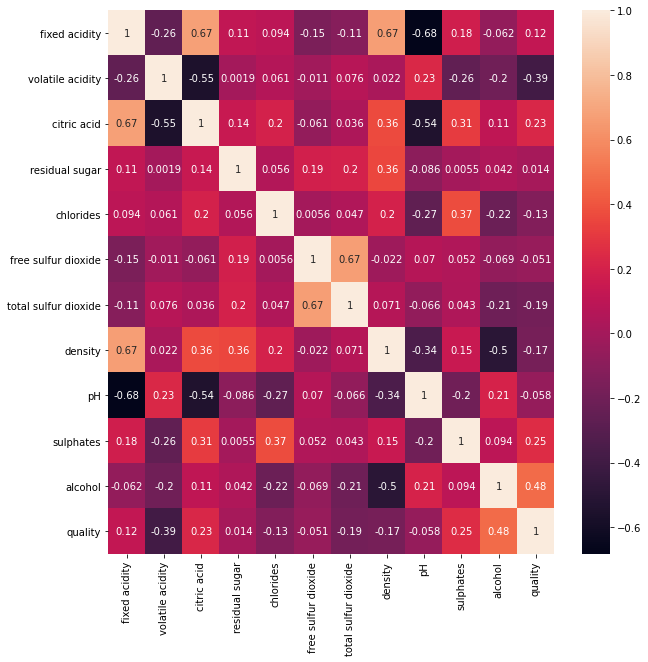

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wineQ.corr(),annot=True)

density  has a strong negative correlation with alcohol.
pH & fixed acidity has negative correlation.
citric acid & volatile acidity has negative correlation.
free sulphur dioxide & total sulphur dioxide has positive correlation.

In [17]:
#as higher correlation of ph so dropping it
df_wineQ.drop('pH',axis=1,inplace=True)

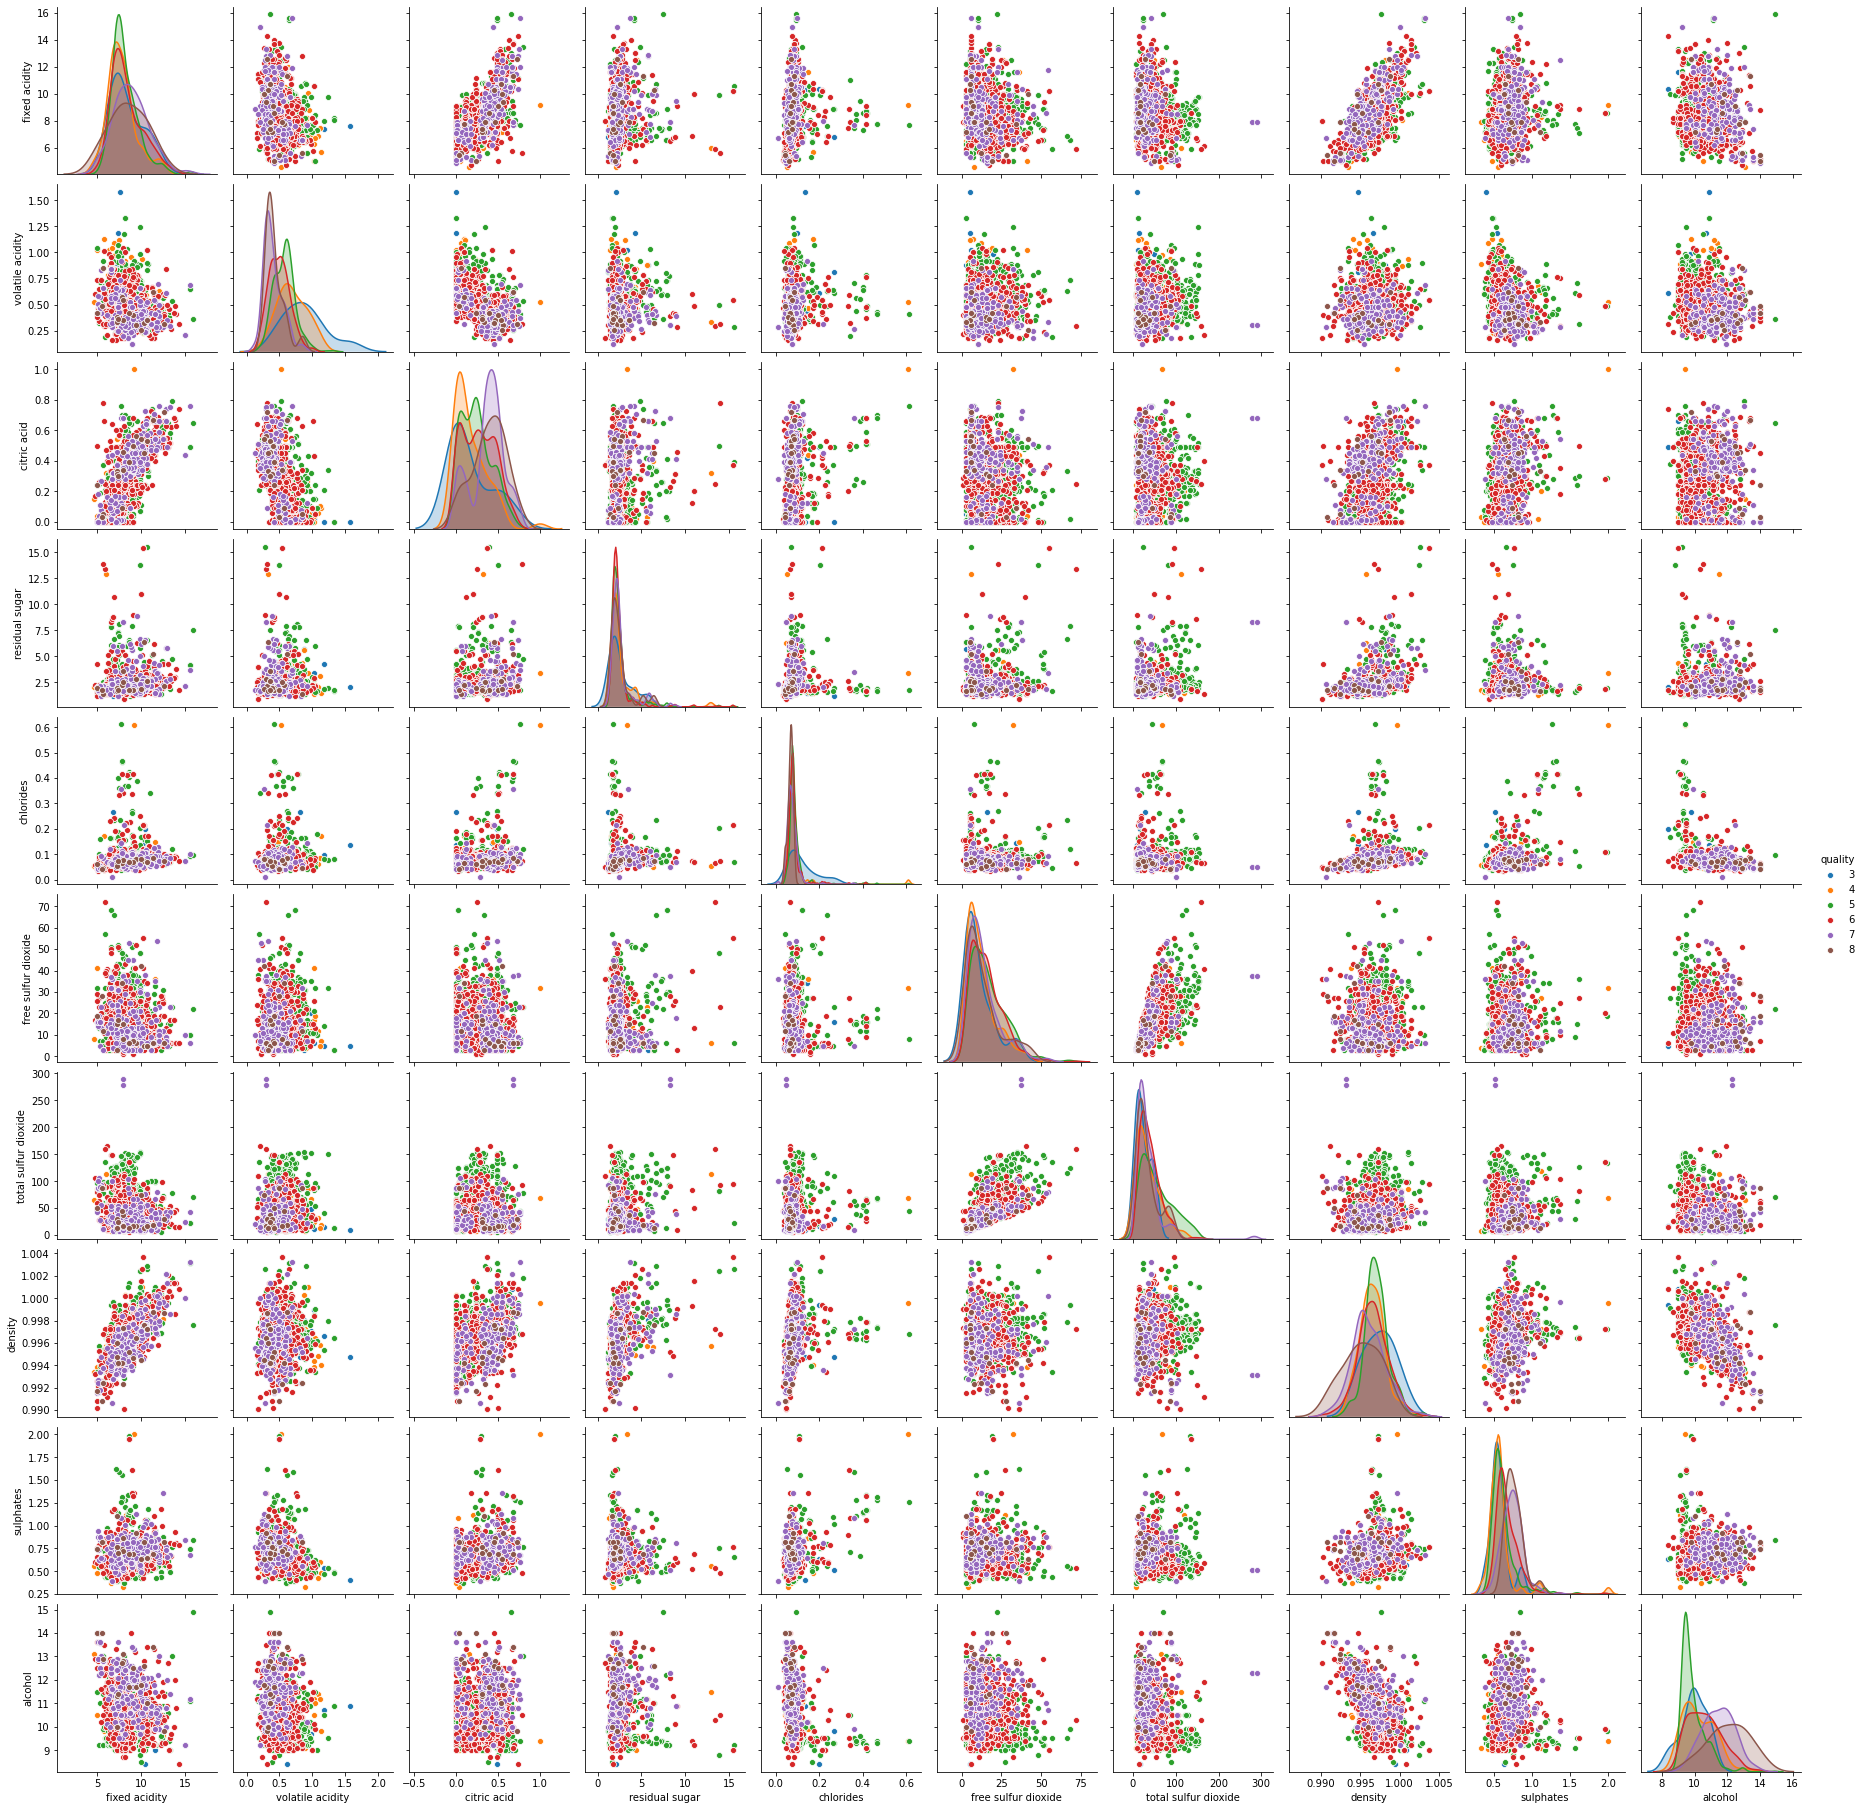

In [18]:
sns.pairplot(df_wineQ ,hue ='quality', vars =['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
 'sulphates', 'alcohol'])

In [19]:
new_D=df_wineQ.drop(['quality'],axis=1)

In [20]:
new_D.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,Bad


In [21]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [22]:
new_D['category'] = label_quality.fit_transform(new_D['category'])

In [23]:
new_D['category'].value_counts()

1    855
0    744
Name: category, dtype: int64

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(new_D[['fixed acidity','volatile acidity', 'citric acid', 'residual sugar',
 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
 'sulphates', 'alcohol']]))
z
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          57,   81,   81,   83,   86,   88,   91,   92,  106,  106,  109,
         120,  126,  127,  142,  144,  147,  151,  151,  151,  163,  164,
         169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
         274,  281,  291,  324,  325,  339,  340,  347,  354,  374,  381,
         391,  396,  396,  400,  400,  442,  442,  451,  467,  480,  480,
         494,  515,  544,  554,  554,  555,  555,  557,  557,  568,  584,
         588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
         652,  652,  672,  672,  684,  690,  692,  692,  723,  724,  730,
         754,  776,  777,  795,  821,  836,  837,  889,  911,  917,  923,
         925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079,
        1079, 1081, 1081, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235,
        1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1295,
        1296, 1299, 1312, 1319, 1319, 

In [25]:
new_D=new_D[(z<3).all(axis=1)]
new_D.shape

(1465, 11)

In [26]:
new_D['category'].value_counts()

1    793
0    672
Name: category, dtype: int64

In [27]:
x=new_D.iloc[:,:-1]
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [28]:
#Now seperate the dataset as response variable and feature variabes
X = new_D.drop('category', axis = 1)
y = new_D['category']

In [29]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [31]:
sel.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True])

In [32]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

4

In [33]:
print(selected_feat)

Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')


In [34]:
X_important_train= sel.transform(X_train)
X_important_test = sel.transform(X_test)

In [35]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [36]:
X_important_train= sc.fit_transform(X_important_train)
X_important_test= sc.fit_transform(X_important_test)

# RF

In [37]:
rfc = RandomForestClassifier(max_depth=4,n_estimators=100)
rfc.fit(X_important_train, y_train)
pred_rfc = rfc.predict(X_important_test)

In [38]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       137
           1       0.76      0.70      0.73       156

    accuracy                           0.72       293
   macro avg       0.72      0.72      0.72       293
weighted avg       0.72      0.72      0.72       293



In [39]:
print ('RF accuracy: TRAINING', rfc.score(X_important_train,y_train))
print ('RF accuracy: TESTING', rfc.score(X_important_test,y_test))

RF accuracy: TRAINING 0.7977815699658704
RF accuracy: TESTING 0.7201365187713311


In [40]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[102  35]
 [ 47 109]]


Support Vector Classifier

In [41]:
svc = SVC()
svc.fit(X_important_train, y_train)
pred_svc = svc.predict(X_important_test)

In [42]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       137
           1       0.73      0.74      0.73       156

    accuracy                           0.72       293
   macro avg       0.72      0.72      0.72       293
weighted avg       0.72      0.72      0.72       293



# Cross Validation Score for random forest 

In [43]:
rfc_eval = cross_val_score(estimator = rfc, X = X_important_train, y = y_train, cv =10)
rfc_eval.mean()

0.7576416050992322